In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("../../code/matplotlib_style/inline_figure.mplstyle")

In [5]:
def y(x):
    return x


In [6]:
# True equation
def true_solution(x):
    return np.exp(x)



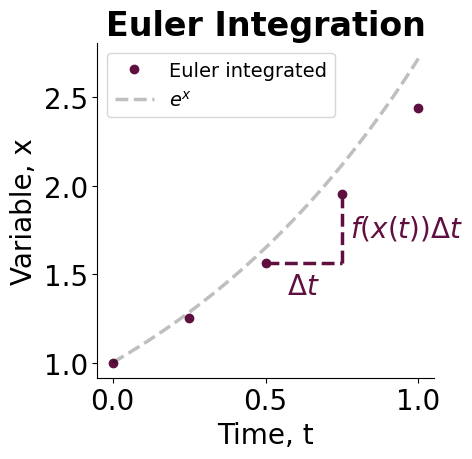

In [113]:
# Euler
step = 0.25 
counts = 4
ts, xs = [0], [1]



for i in range(counts):
    t, x = ts[-1], xs[-1]

    new_t = t + step
    new_x = x + step * y(x)

    ts.append(new_t)
    xs.append(new_x)


fig, ax = plt.subplots(figsize = (5, 5))
ax.plot(ts, xs, "o", label = "Euler integrated")

ax.hlines(xs[2], 0.50, 0.75, "C0", linestyles = "--" )
ax.text(0.625, xs[2]  - 0.05, r"$\Delta t$", ha = "center", va = "top", color = "C0") #, transform = ax.transAxes)

ax.vlines(0.75, xs[2], xs[3], colors = "C0", linestyles = "--" )
ax.text(0.775, np.mean(xs[2:4]), r"$f(x(t))\Delta t$", color = "C0", va = "center")


t_true = np.linspace(0, 1, 100)
x_true = true_solution(t_true)

ax.plot(t_true, x_true, "k--", alpha = 0.25, label  = r"$e^x$")

ax.set(
    title = "Euler Integration",
    xlabel = "Time, t",
    ylabel = "Variable, x"
)
ax.legend(fontsize = 14)
fig.tight_layout()

fig.savefig("euler_integration.pdf")


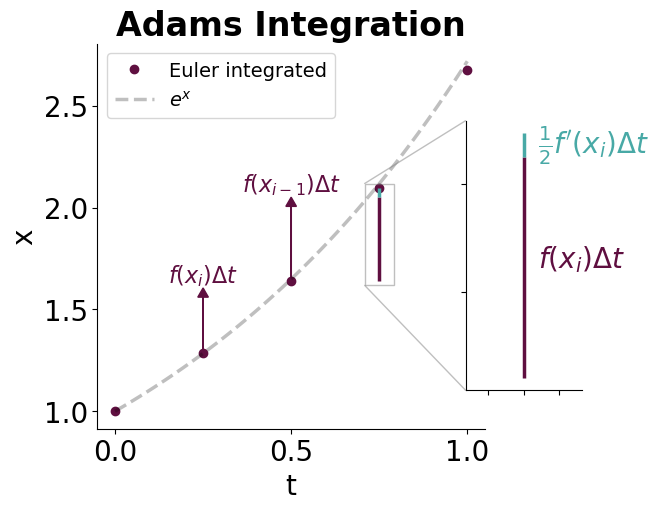

In [112]:
# Euler
step = 0.25 
counts = 3
ts, xs = [0, 0.25], [1, np.exp(0.25)]



for i in range(counts):
    t, x = ts[-2:], xs[-2:]
    
    new_t = t[-1] + step

    dx = y(x[1])
    dx_2 = 1/2 * y(x[1]) - 1 / 2 * y(x[0])

    new_x = x[1] + step * (dx + dx_2)

    # new_x = x + step * y(x)

    ts.append(new_t)
    xs.append(new_x)


fig, ax = plt.subplots(figsize = (5, 5))
ax.plot(ts, xs, "o", label = "Euler integrated")


ax.arrow(0.25, xs[1], 0, y(xs[1]) * step, color = "C0", head_width = 0.03, length_includes_head = True )
ax.text(0.25, xs[1] + y(xs[1]) * step, r"$f(x_i) \Delta t$",  va = "bottom", ha = "center", color = "C0", fontsize = 16)
ax.arrow(0.50, xs[2], 0, y(xs[2]) * step, color = "C0", head_width = 0.03, length_includes_head = True )
ax.text(0.50, xs[2] + y(xs[2]) * step, r"$f(x_{i-1}) \Delta t$",  va = "bottom", ha = "center", color = "C0", fontsize = 16)

ax.vlines(0.75, xs[2], xs[2] + y(xs[2]) * step, ls = "-", color = "C0")
ax.vlines(0.75, xs[2] + y(xs[2]) * step, xs[3], ls = "-", color = "C1")

# ax.hlines(xs[2], 0.50, 0.75, "C0", linestyles = "--" )
# ax.text(0.625, xs[2]  - 0.05, r"$\Delta t$", ha = "center", va = "top", color = "C0") #, transform = ax.transAxes)

# ax.vlines(0.75, xs[2], xs[3], colors = "C0", linestyles = "--" )
# ax.text(0.775, np.mean(xs[2:4]), r"$f(x)\Delta t$", color = "C0", va = "center")


t_true = np.linspace(0, 1, 100)
x_true = true_solution(t_true)

ax.plot(t_true, x_true, "k--", alpha = 0.25, label  = r"$e^x$")

ax.set(
    title = "Adams Integration",
    xlabel = "t",
    ylabel = "x"
)


ax_inner = ax.inset_axes([0.95, 0.1, 0.3, 0.7])
ax_inner.set_xticklabels([])
ax_inner.set_yticklabels([])

ax_inner.vlines(0.75, xs[2], xs[2] + y(xs[2]) * step, ls = "-", color = "C0")
ax_inner.text(0.76, xs[2] + y(xs[2]) * step / 2, r"$f(x_i)\Delta t$", color = "C0")
ax_inner.vlines(0.75, xs[2] + y(xs[2]) * step, xs[3], ls = "-", color = "C1")
ax_inner.text(0.76, xs[2] + y(xs[2]) * 5 * step / 4 - y(xs[1]) * step / 4, r"$\frac{1}{2} f '(x_i)\Delta t$", va = "center", color = "C1")

ax.indicate_inset_zoom(ax_inner)

ax.legend(fontsize = 14)
# fig.tight_layout()

fig.savefig("adams_intergation.pdf")

In [91]:
fig

[0, 0.25, 0.5, 0.75, 1.0]